In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from collections import Counter

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

np.random.seed(42)

In [ ]:
# Configurations
DATA_DIR = './/dog-breed-identification'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
LABELS_FILE = os.path.join(DATA_DIR, 'labels.csv')
RESULTS_DIR = './results/eda'

if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

In [ ]:
# Load & inspect labels
labels_df = pd.read_csv(LABELS_FILE)

print(labels_df.head())

print(f"\nDataset shape: {labels_df.shape}")
print(f"Columns: {labels_df.columns.tolist()}")
print(f"Missing values:\n{labels_df.isnull().sum()}")

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

Dataset shape: (10222, 2)
Columns: ['id', 'breed']
Missing values:
id       0
breed    0
dtype: int64


In [ ]:
# Class distribution analysis
breed_counts = labels_df['breed'].value_counts()
n_breeds = len(breed_counts)

print(f"Number of unique breeds: {n_breeds}")
print("Breed distribution:")
print(breed_counts.describe())

Number of unique breeds: 120
Breed distribution:
count    120.000000
mean      85.183333
std       13.298122
min       66.000000
25%       75.000000
50%       82.000000
75%       91.250000
max      126.000000
Name: count, dtype: float64


In [ ]:
# Display top and bottom 10 breeds
print(f"Top 10 most common breeds:")
for i, (breed, count) in enumerate(breed_counts.head(10).items(), 1):
    print(f"  {i:2d}. {breed:25s}: {count:3d} images")

print(f"\nTop 10 least common breeds:")
for i, (breed, count) in enumerate(breed_counts.tail(10).items(), 1):
    print(f"  {i:2d}. {breed:25s}: {count:3d} images")

Top 10 most common breeds:
   1. scottish_deerhound       : 126 images
   2. maltese_dog              : 117 images
   3. afghan_hound             : 116 images
   4. entlebucher              : 115 images
   5. bernese_mountain_dog     : 114 images
   6. shih-tzu                 : 112 images
   7. great_pyrenees           : 111 images
   8. pomeranian               : 111 images
   9. basenji                  : 110 images
  10. samoyed                  : 109 images

Top 10 least common breeds:
   1. walker_hound             :  69 images
   2. german_shepherd          :  69 images
   3. otterhound               :  69 images
   4. giant_schnauzer          :  69 images
   5. tibetan_mastiff          :  69 images
   6. golden_retriever         :  67 images
   7. komondor                 :  67 images
   8. brabancon_griffon        :  67 images
   9. eskimo_dog               :  66 images
  10. briard                   :  66 images


In [38]:
# Check class balance
imbalance_ratio = breed_counts.max() / breed_counts.min()
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.2f}")

Class imbalance ratio (max/min): 1.91


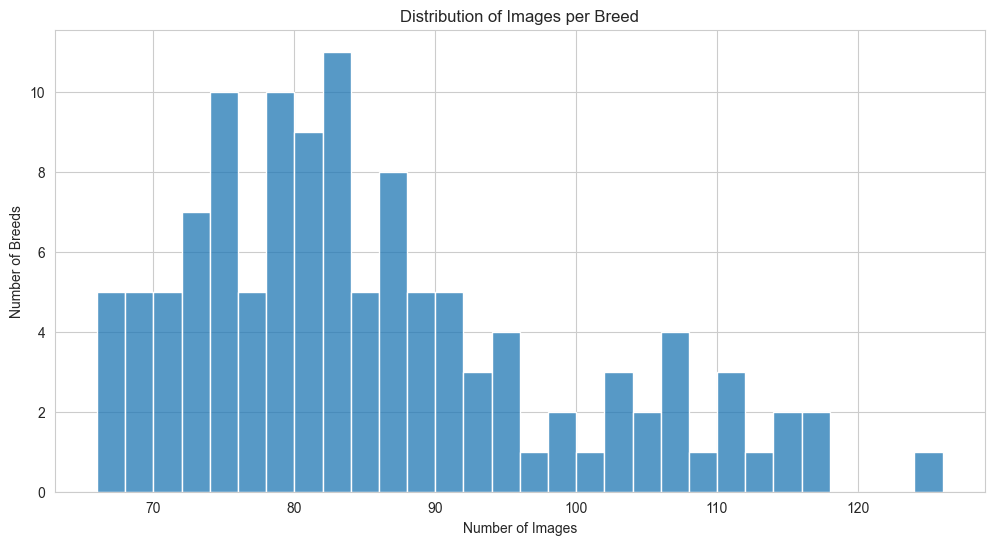

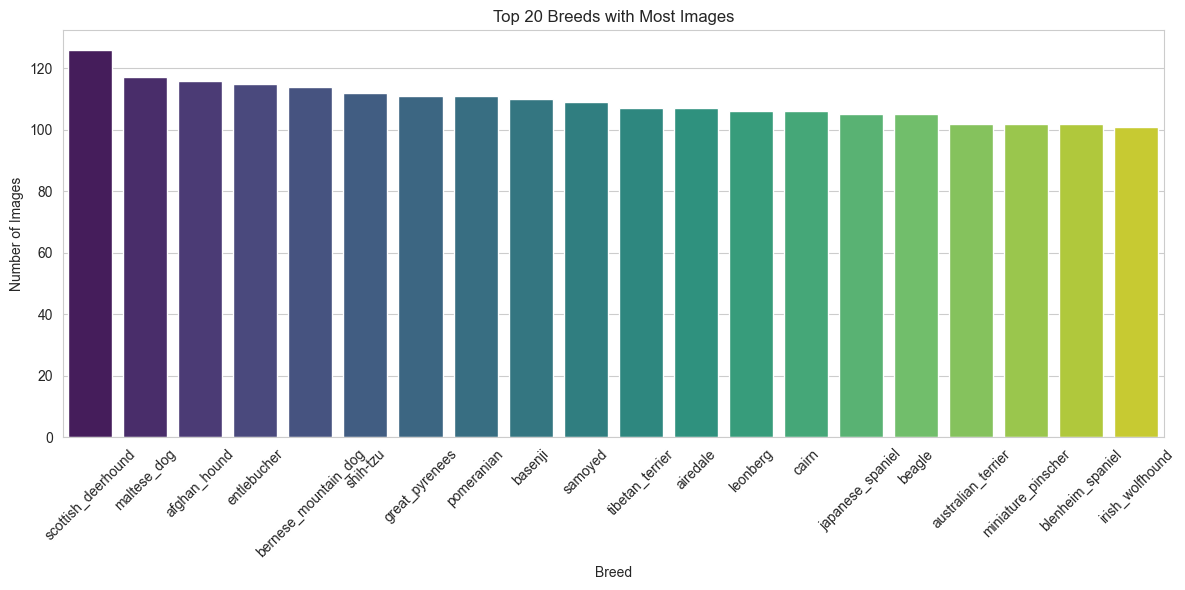

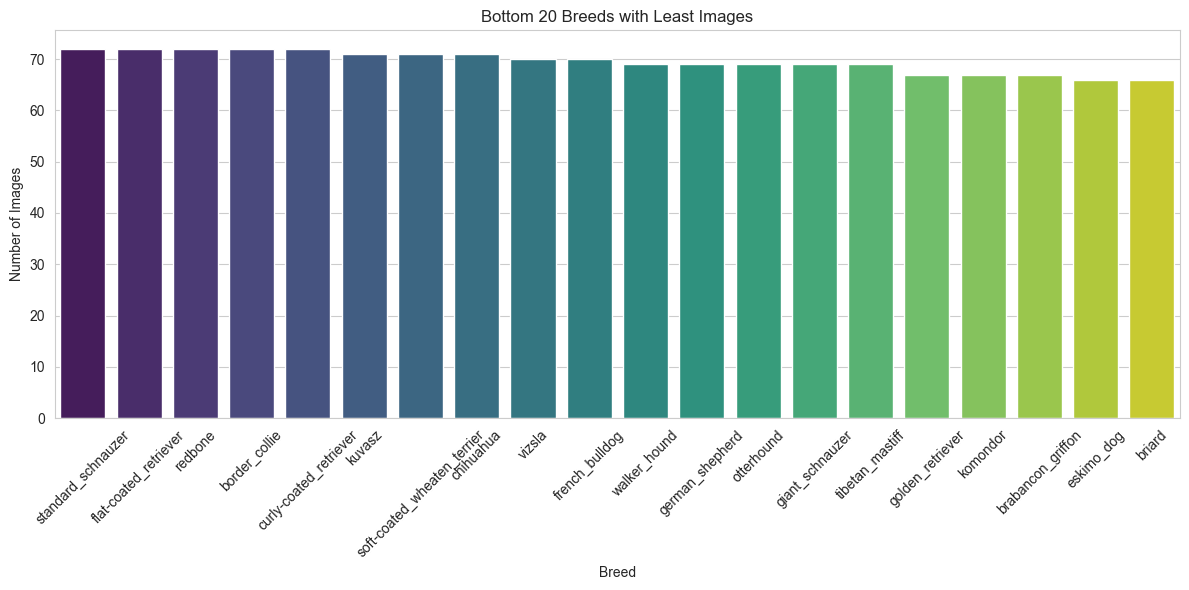

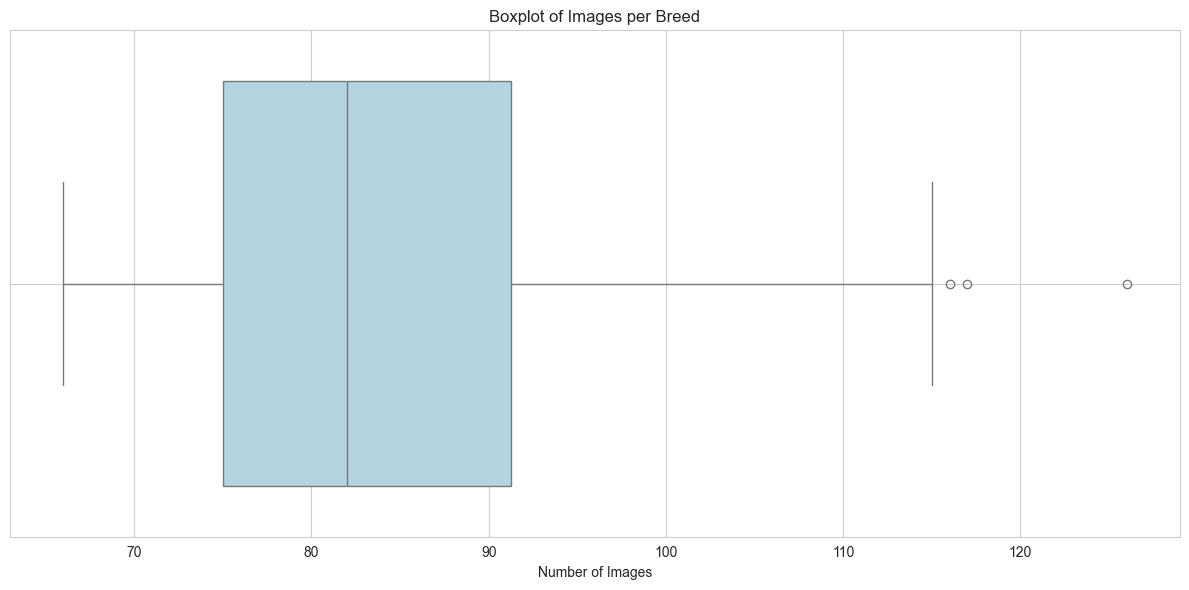

In [49]:
# Visualize class distribution
top_20 = breed_counts.head(20)
bottom_20 = breed_counts.tail(20)

# Histogram of samples per breed
plt.figure(figsize=(12, 6))
sns.histplot(breed_counts, bins=30, kde=False)
plt.title('Distribution of Images per Breed')
plt.xlabel('Number of Images')
plt.ylabel('Number of Breeds')

# Top 20 breeds
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')
plt.title('Top 20 Breeds with Most Images')
plt.xlabel('Breed')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()

# Bottom 20 breeds
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_20.index, y=bottom_20.values, palette='viridis')
plt.title('Bottom 20 Breeds with Least Images')
plt.xlabel('Breed')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()

# Boxplot of breed distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=breed_counts, color='lightblue')
plt.title('Boxplot of Images per Breed')
plt.xlabel('Number of Images')
plt.grid(True)
plt.tight_layout()

In [54]:
# Image properties analysis
sample_size = min(1000, len(labels_df))
sample_ids = labels_df.sample(n=sample_size, random_state=42)['id'].tolist()

widths, heights, aspect_ratios, file_sizes, modes = [], [], [], [], []

for img_id in sample_ids:
    img_path = os.path.join(TRAIN_DIR, f"{img_id}.jpg")

    if os.path.exists(img_path):
        img = Image.open(img_path)

        widths.append(img.width)
        heights.append(img.height)
        aspect_ratios.append(img.width / img.height)
        modes.append(img.mode)
        file_sizes.append(os.path.getsize(img_path) / 1024)
        img.close()

# Statistics
print(f"Image Dimensions:")
print(f"    Width        - Min: {min(widths):4d}, Max: {max(widths):4d}, Mean: {np.mean(widths):.1f}")
print(f"    Height       - Min: {min(heights):4d}, Max: {max(heights):4d}, Mean: {np.mean(heights):.1f}")
print(f"    Aspect Ratio - Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}, Mean: {np.mean(aspect_ratios):.2f}")

print(f"\nFile Sizes:")
print(f"    Min: {min(file_sizes):.1f} KB, Max: {max(file_sizes):.1f} KB, Mean: {np.mean(file_sizes):.1f} KB")

print(f"\nImage Modes:")
mode_counts = Counter(modes)
for mode, count in mode_counts.items():
    print(f"    {mode}: {count} images ({count/len(modes)*100:.1f}%)")

Image Dimensions:
    Width        - Min:  112, Max: 2048, Mean: 442.4
    Height       - Min:  120, Max: 1879, Mean: 391.0
    Aspect Ratio - Min: 0.42, Max: 2.16, Mean: 1.17

File Sizes:
    Min: 4.0 KB, Max: 653.4 KB, Mean: 35.3 KB

Image Modes:
    RGB: 1000 images (100.0%)


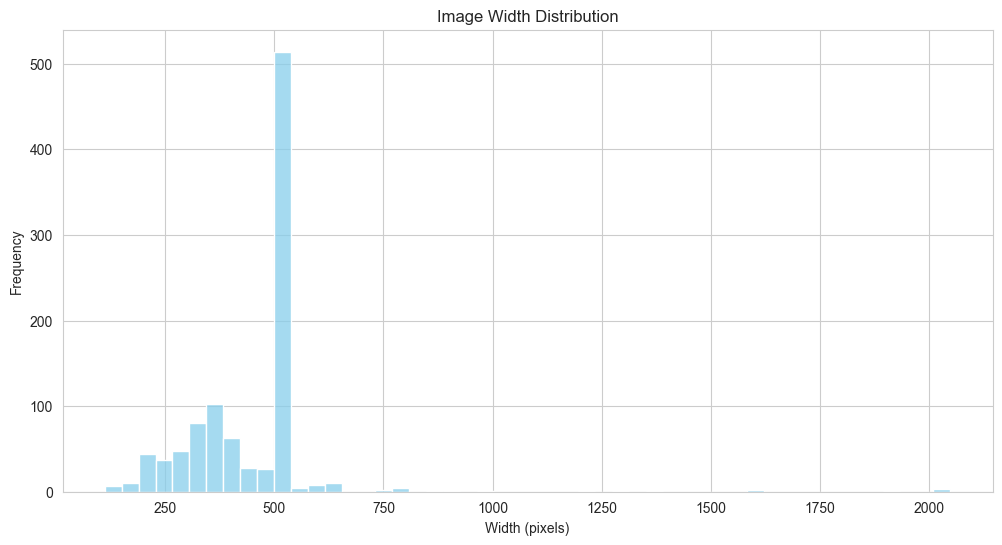

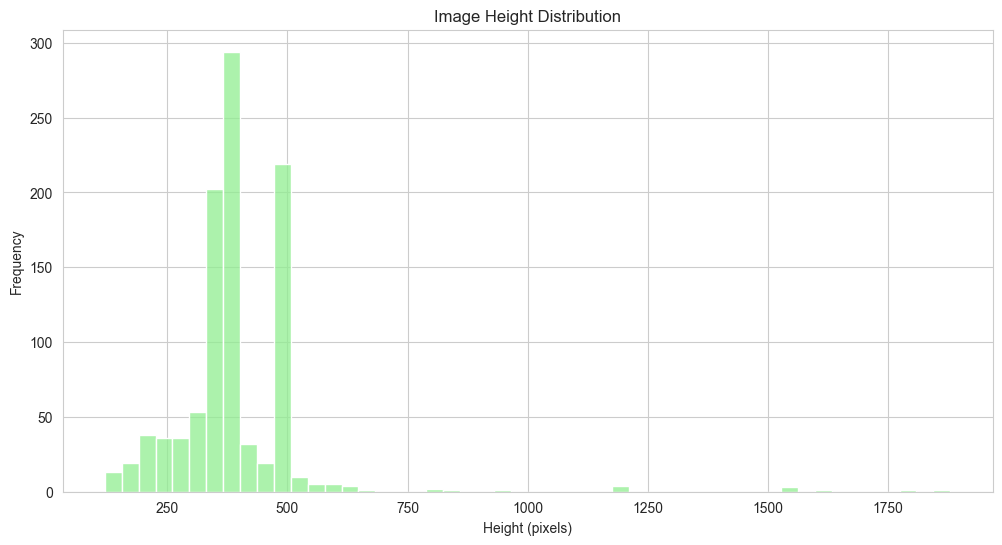

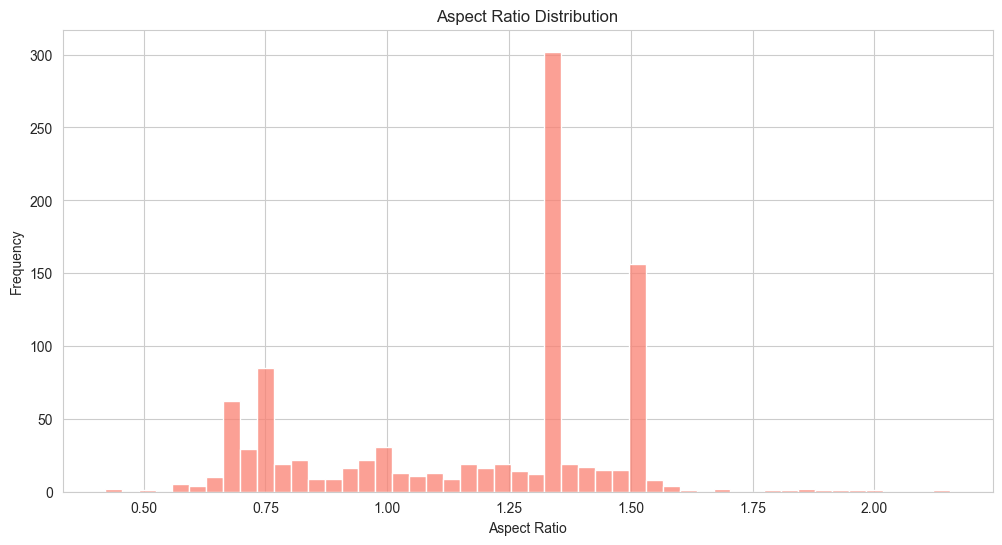

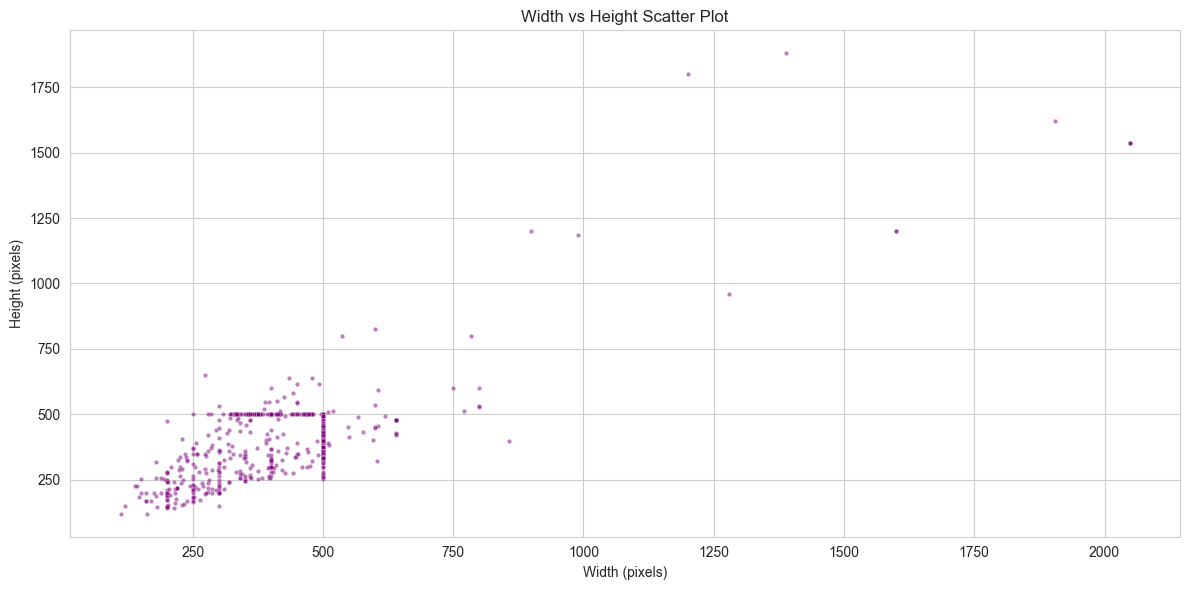

In [79]:
# Visualize image properties

# Width distribution
plt.figure(figsize=(12, 6))
sns.histplot(widths, bins=50, kde=False, color='skyblue')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# Height distribution
plt.figure(figsize=(12, 6))
sns.histplot(heights, bins=50, kde=False, color='lightgreen')
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

# Aspect ratio distribution
plt.figure(figsize=(12, 6))
sns.histplot(aspect_ratios, bins=50, kde=False, color='salmon')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')

# Scatter: width vs height
plt.figure(figsize=(12, 6))
sns.scatterplot(x=widths, y=heights, alpha=0.5, s=10, color='purple')
plt.title('Width vs Height Scatter Plot')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.tight_layout()

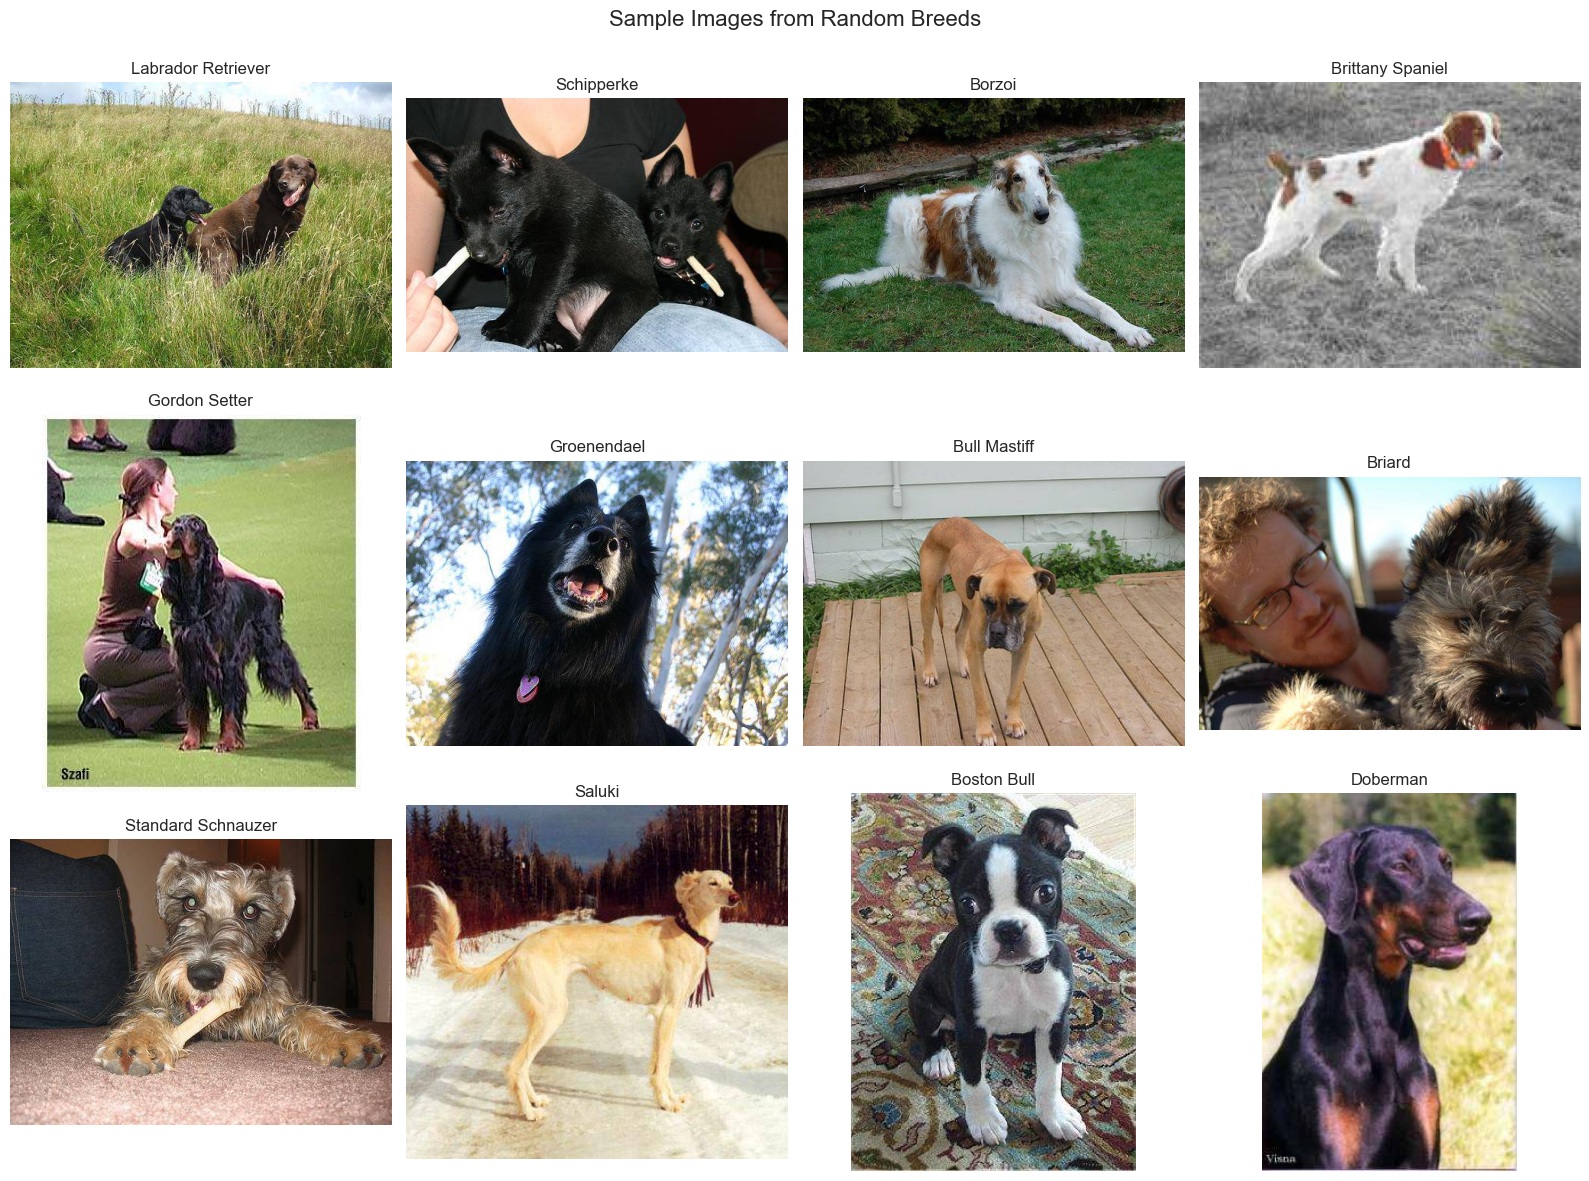

In [82]:
# Sample images visualization
n_breeds_to_show = 12
random_breeds = np.random.choice(labels_df['breed'].unique(), n_breeds_to_show, replace=False)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, breed in enumerate(random_breeds):
    img_id = labels_df[labels_df['breed'] == breed].sample(1, random_state=42)['id'].values[0]
    img_path = os.path.join(TRAIN_DIR, f"{img_id}.jpg")
    
    if os.path.exists(img_path):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(breed.replace('_', ' ').title())
        axes[idx].axis('off')
        img.close()

plt.suptitle('Sample Images from Random Breeds', fontsize=16)
plt.tight_layout()

In [88]:
# Summary statistics
summary = {
    'Total Images': len(labels_df),
    'Number of Breeds': n_breeds,
    'Samples per Breed (Mean)': f"{breed_counts.mean():.2f}",
    'Samples per Breed (Std)': f"{breed_counts.std():.2f}",
    'Samples per Breed (Min)': breed_counts.min(),
    'Samples per Breed (Max)': breed_counts.max(),
    'Class Imbalance Ratio': f"{imbalance_ratio:.2f}",
    'Mean Image Width': f"{np.mean(widths):.1f} px",
    'Mean Image Height': f"{np.mean(heights):.1f} px",
    'Mean Aspect Ratio': f"{np.mean(aspect_ratios):.2f}",
    'Mean File Size': f"{np.mean(file_sizes):.1f} KB"
}

print("Summary Statistics:")
for key, value in summary.items():
    print(f"    {key:25s}: {value}")

# Save summary to file
summary_df = pd.DataFrame([summary]).T
summary_df.columns = ['Value']
summary_df.to_csv(os.path.join(RESULTS_DIR, 'summary_statistics.csv'))
print(f"\nSaved: summary_statistics.csv")

# Save breed distribution to file
breed_counts_df = pd.DataFrame({
    'Breed': breed_counts.index,
    'Count': breed_counts.values
})
breed_counts_df.to_csv(os.path.join(RESULTS_DIR, 'breed_distribution.csv'), index=False)
print(f"Saved: breed_distribution.csv")

Summary Statistics:
    Total Images             : 10222
    Number of Breeds         : 120
    Samples per Breed (Mean) : 85.18
    Samples per Breed (Std)  : 13.30
    Samples per Breed (Min)  : 66
    Samples per Breed (Max)  : 126
    Class Imbalance Ratio    : 1.91
    Mean Image Width         : 442.4 px
    Mean Image Height        : 391.0 px
    Mean Aspect Ratio        : 1.17
    Mean File Size           : 35.3 KB

Saved: summary_statistics.csv
Saved: breed_distribution.csv
